In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import LogLocator, FormatStrFormatter

In [5]:
# Average out results from different runs
file_pattern = 'avl_trees/del/1MB_keys/avl_tree_del_metrics_1k_*.csv'
all_files = glob.glob(file_pattern)

# Read each file into a DataFrame and store them in a list
df_list = []
for file in all_files:
    df = pd.read_csv(file)
    df_list.append(df)

# Extract the 'index' and 'duration' columns from each DataFrame
durations_list = [df[['index', 'duration']] for df in df_list]

# Combine the DataFrames by merging them on the 'index' column
combined_df = pd.concat(durations_list, axis=1)

# Calculate the mean duration for each insertion index
average_durations = combined_df.loc[:, combined_df.columns.str.contains('duration')].mean(axis=1)

# Create a DataFrame for the averaged results
averaged_df = pd.DataFrame({
    'index': combined_df['index'].iloc[:, 0],  # Use the 'index' from the first DataFrame
    'duration': average_durations
})

print(averaged_df['duration'].describe())

averaged_df.to_csv('avl_trees/del/1MB_keys/avl_tree_average_del_metrics_1k.csv', index=False)

count    1.000000e+03
mean     2.836940e+05
std      1.605398e+05
min      1.433790e+05
25%      2.146616e+05
50%      2.702291e+05
75%      3.141032e+05
max      2.488058e+06
Name: duration, dtype: float64


### Average insertion time of uuid keys in Hash Tables across 1000 operations

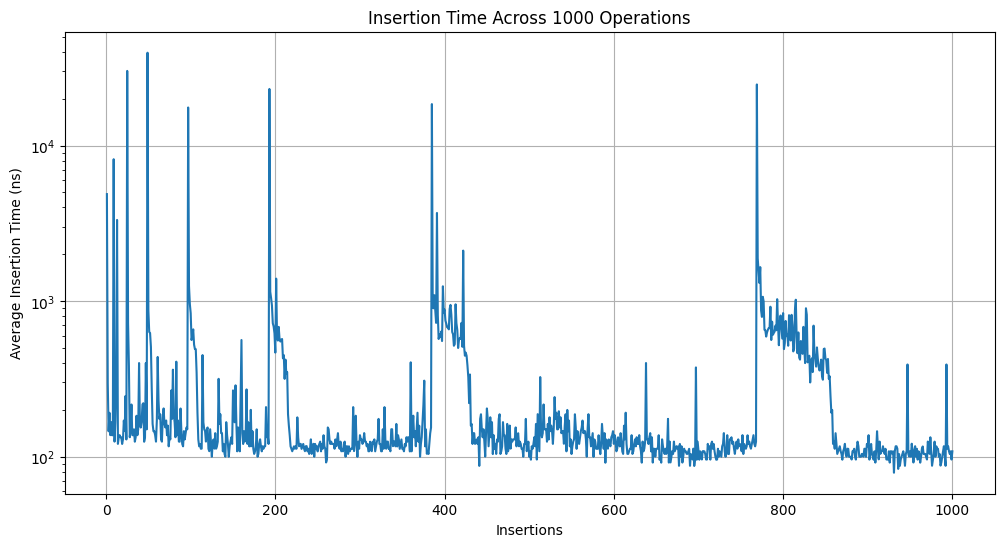

count     1000.000000
mean       391.172100
std       2081.899954
min         78.900000
25%        112.400000
50%        125.000000
75%        174.925000
max      39517.000000
Name: duration, dtype: float64


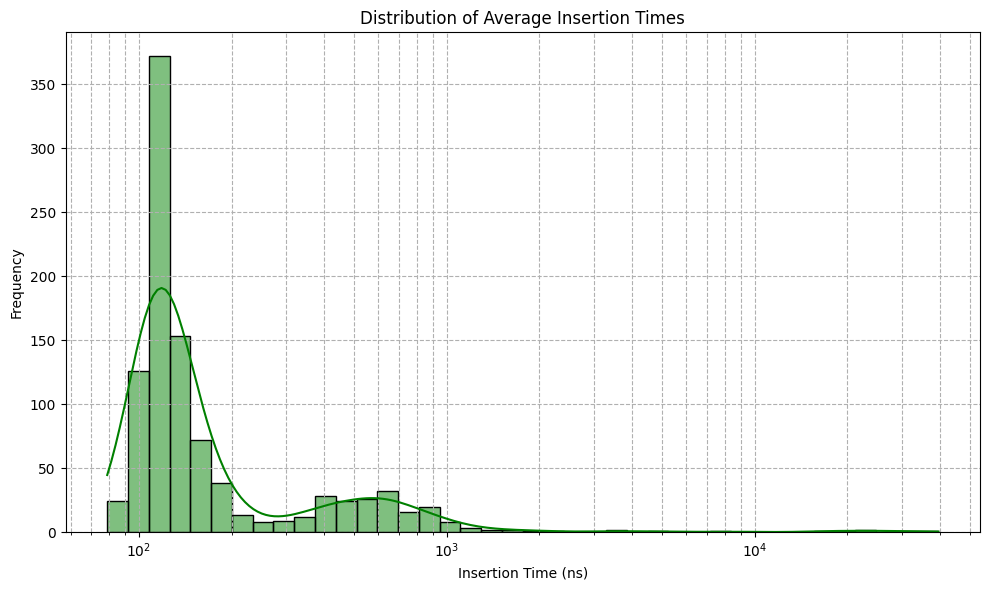

In [21]:
# Average insertion times across 1000 operations for Hash Tables

averaged_df = pd.read_csv('hash_tables/set/uuid_keys/hash_table_average_set_metrics_1k.csv')

plt.figure(figsize=(12, 6))
sns.lineplot(x='index', y='duration', data=averaged_df)
plt.title('Insertion Time Across 1000 Operations')
plt.xlabel('Insertions')
plt.ylabel('Average Insertion Time (ns)')
plt.yscale('log')
plt.grid(True)
plt.savefig('hash_table_average_set_metrics_1k_lineplot.png', bbox_inches='tight')
plt.show()

print(averaged_df['duration'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(averaged_df['duration'], bins=40, kde=True, color='g', log_scale=True)
plt.title('Distribution of Average Insertion Times')
plt.xlabel('Insertion Time (ns)')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.savefig('hash_table_average_set_metrics_1k_histogram.png', bbox_inches='tight')
plt.show()

### Average insertion time of uuid keys in AVL Trees across 1000 operations

count    1000.000000
mean      421.829700
std       278.148252
min       295.700000
25%       350.000000
50%       375.000000
75%       420.500000
max      5800.100000
Name: duration, dtype: float64


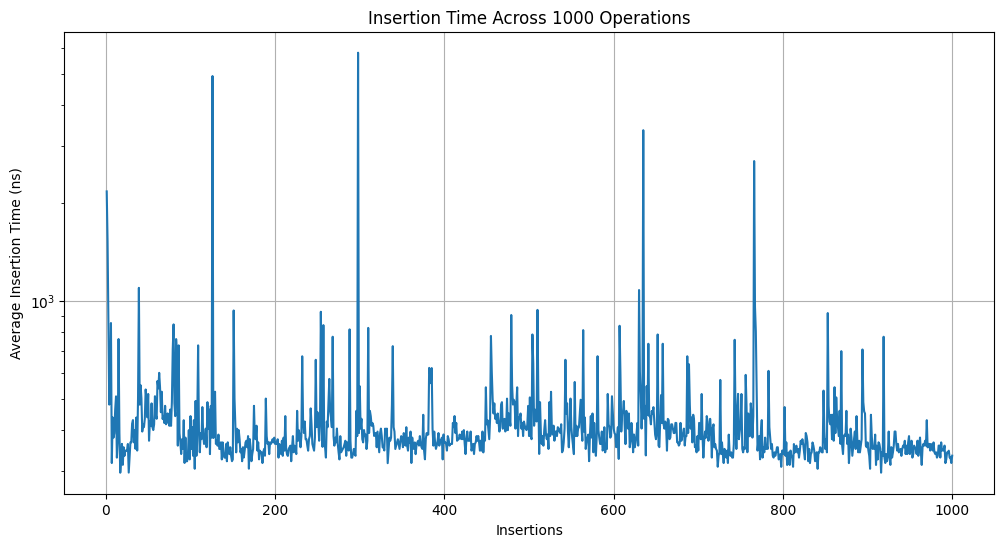

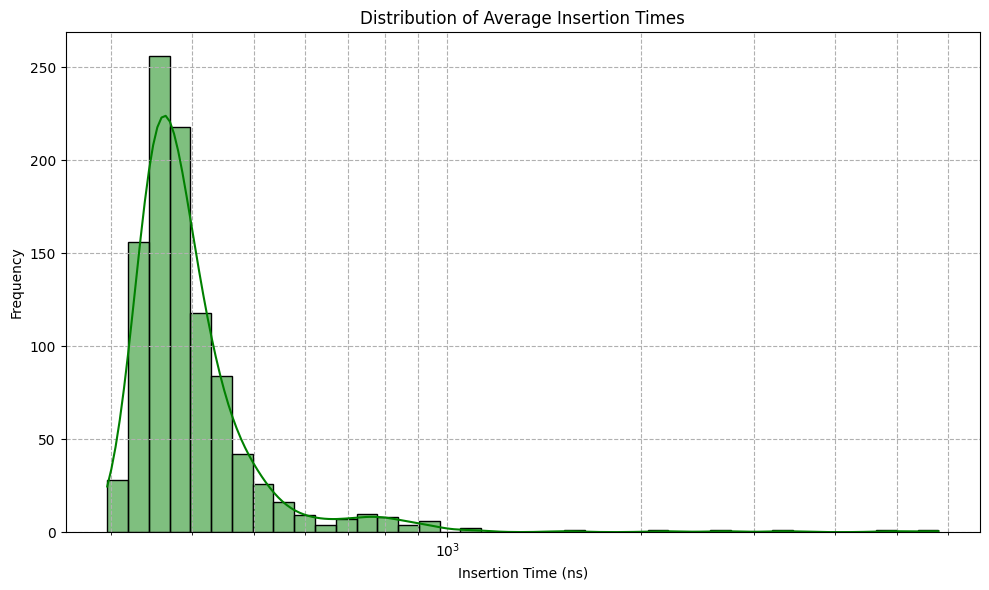

In [20]:
# Average insertion time across 1000 operations for AVL Trees

averaged_df = pd.read_csv('avl_trees/set/uuid_keys/avl_tree_average_set_metrics_1k.csv')

print(averaged_df['duration'].describe())

plt.figure(figsize=(12, 6))
sns.lineplot(x='index', y='duration', data=averaged_df)
plt.title('Insertion Time Across 1000 Operations')
plt.xlabel('Insertions')
plt.ylabel('Average Insertion Time (ns)')
plt.yscale('log')
plt.grid(True)
plt.savefig('avl_trees/set/uuid_keys/avl_tree_average_set_metrics_1k_lineplot.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(averaged_df['duration'], bins=40, kde=True, color='g', log_scale=True)
plt.title('Distribution of Average Insertion Times')
plt.xlabel('Insertion Time (ns)')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.savefig('avl_trees/set/uuid_keys/avl_tree_average_set_metrics_1k_histogram.png', bbox_inches='tight')
plt.show()

### Average insertion time of large 1MB keys in Hash Tables across 1000 operations

count      1000.000000
mean      64843.966200
std      110697.433379
min       14912.400000
25%       15819.700000
50%       16362.600000
75%       17896.000000
max      717116.400000
Name: duration, dtype: float64


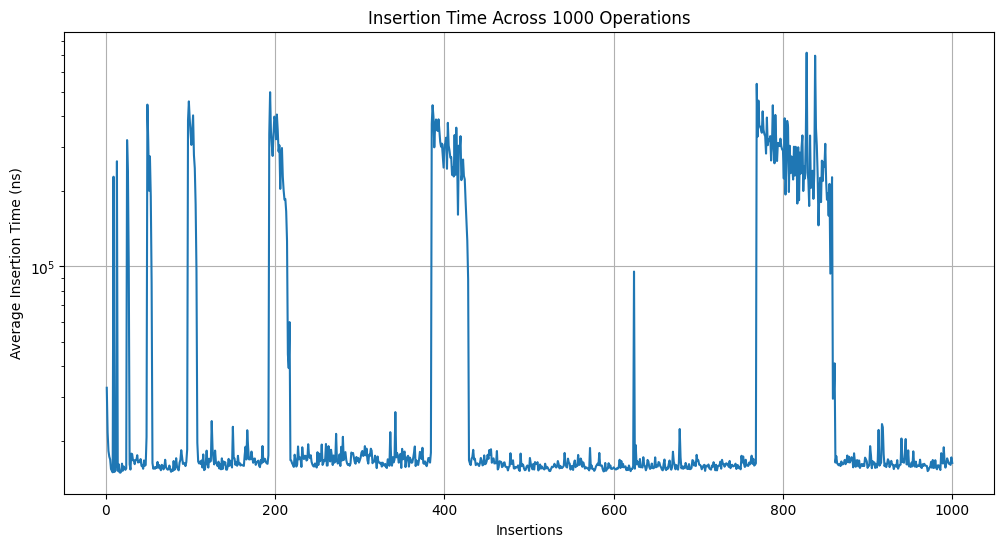

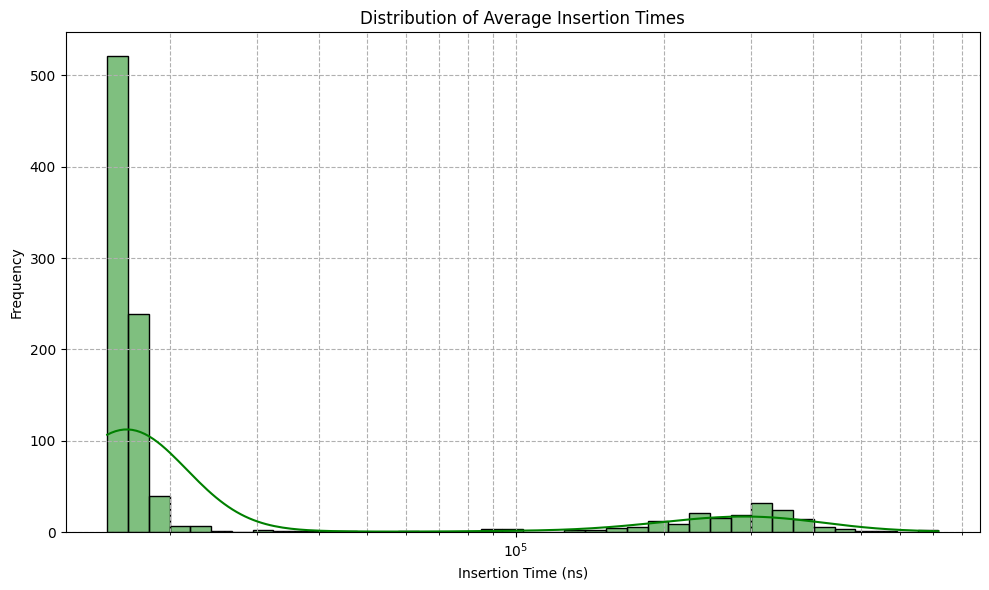

In [24]:
# Average insertion time of large 1MB keys, across 1000 operations for Hash Tables

averaged_df = pd.read_csv('hash_tables/set/1MB_keys/hash_table_average_set_metrics_1k.csv')

print(averaged_df['duration'].describe())

plt.figure(figsize=(12, 6))
sns.lineplot(x='index', y='duration', data=averaged_df)
plt.title('Insertion Time Across 1000 Operations')
plt.xlabel('Insertions')
plt.ylabel('Average Insertion Time (ns)')
plt.yscale('log')
plt.grid(True)
# Set custom tick positions and labels
# ax = plt.gca()
# ax.set_yticks([10**4, 10**5])
# ax.set_yticklabels(['10^4', '10^5'])
plt.savefig('hash_tables/set/1MB_keys/hash_table_average_set_metrics_1k_1MB_lineplot.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(averaged_df['duration'], bins=40, kde=True, color='g', log_scale=True)
plt.title('Distribution of Average Insertion Times')
plt.xlabel('Insertion Time (ns)')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.savefig('hash_tables/set/1MB_keys/hash_table_average_set_metrics_1k_1MB_histogram.png', bbox_inches='tight')
plt.show()

### Average insertion time of large 1MB keys in AVL Trees across 1000 operations

count     1000.000000
mean      1986.793700
std        780.035177
min        349.900000
25%       1620.950000
50%       1920.750000
75%       2275.125000
max      12170.800000
Name: duration, dtype: float64


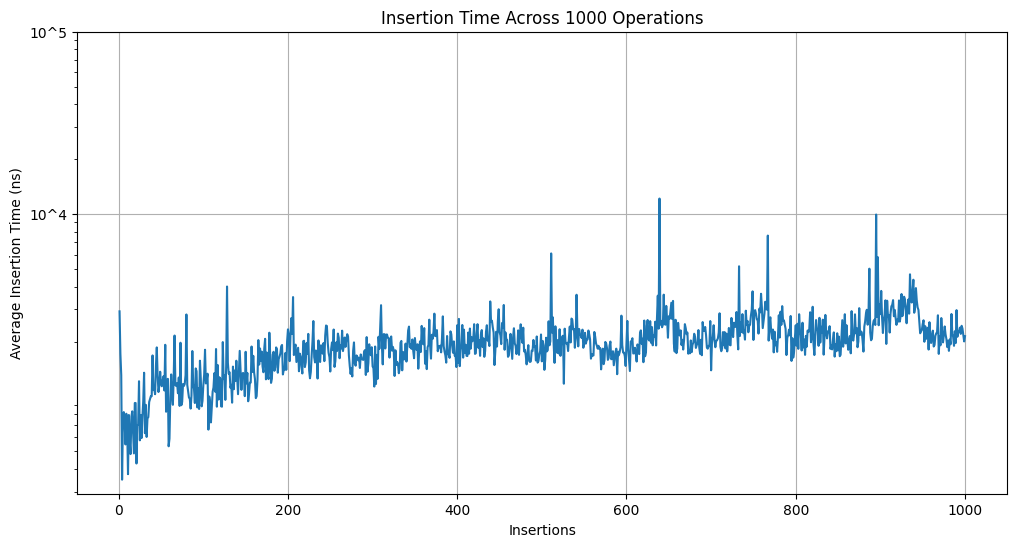

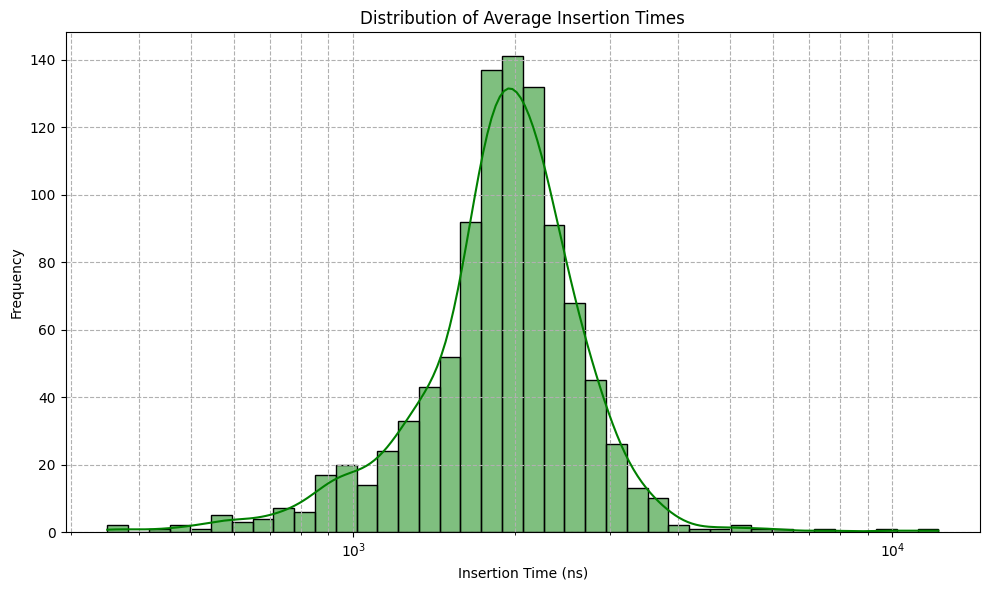

In [26]:
# Average insertion time of large 1MB keys, across 1000 operations for AVL Trees

averaged_df = pd.read_csv('avl_trees/set/1MB_keys/avl_tree_average_set_metrics_1k.csv')

print(averaged_df['duration'].describe())

plt.figure(figsize=(12, 6))
sns.lineplot(x='index', y='duration', data=averaged_df)
plt.title('Insertion Time Across 1000 Operations')
plt.xlabel('Insertions')
plt.ylabel('Average Insertion Time (ns)')
plt.yscale('log')
plt.grid(True)
# Access the current axes
ax = plt.gca()
# Set custom tick positions and labels
ax.set_yticks([10**4, 10**5])
ax.set_yticklabels(['10^4', '10^5'])
plt.savefig('avl_trees/set/1MB_keys/avl_tree_average_set_metrics_1k_1MB_lineplot.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(averaged_df['duration'], bins=40, kde=True, color='g', log_scale=True)
plt.title('Distribution of Average Insertion Times')
plt.xlabel('Insertion Time (ns)')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.savefig('avl_trees/set/1MB_keys/avl_tree_average_set_metrics_1k_1MB_histogram.png', bbox_inches='tight')
plt.show()

### Average search time of uuid keys in Hash tables across 1000 operations

count     1000.000000
mean       361.266800
std        890.436778
min        129.100000
25%        174.800000
50%        214.600000
75%        324.925000
max      22129.200000
Name: duration, dtype: float64


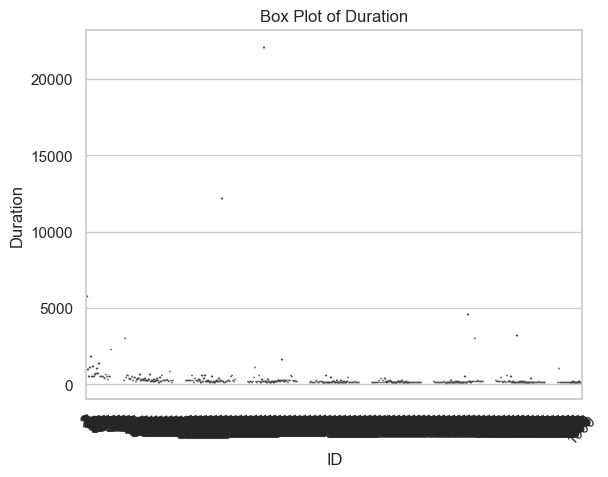

In [38]:
# Average search time of uuid keys across 1000 operations for Hash Tables

averaged_df = pd.read_csv('hash_tables/get/uuid_keys/hash_table_average_get_metrics_1k.csv')

print(averaged_df['duration'].describe())

# plt.figure(figsize=(12, 6))
# sns.lineplot(x='index', y='duration', data=averaged_df)
# plt.title('Search Time Across 1000 Operations')
# plt.xlabel('Searches')
# plt.ylabel('Average Search Time (ns)')
# plt.yscale('log')
# plt.grid(True)
# # plt.savefig('hash_tables/get/uuid_keys/hash_table_average_get_metrics_1k_lineplot.png', bbox_inches='tight')
# plt.show()

sns.set(style="whitegrid")
sns.boxplot(x='index', y='duration', data=averaged_df)
plt.title('Box Plot of Duration')
plt.xlabel('ID')
plt.ylabel('Duration')
plt.xticks(rotation=45)
plt.show()

# plt.figure(figsize=(10, 6))
# sns.histplot(averaged_df['duration'], bins=40, kde=True, color='g', log_scale=True)
# plt.title('Distribution of Average Search Times')
# plt.xlabel('Search Time (ns)')
# plt.ylabel('Frequency')
# plt.grid(True, which="both", ls="--")
# plt.tight_layout()
# # plt.savefig('hash_tables/get/uuid_keys/hash_table_average_get_metrics_1k_histogram.png', bbox_inches='tight')
# plt.show()

### Average search time of uuid keys in AVL Trees across 1000 operations

count    1000.000000
mean      464.698500
std       292.805828
min       291.600000
25%       358.200000
50%       391.600000
75%       470.900000
max      6453.200000
Name: duration, dtype: float64


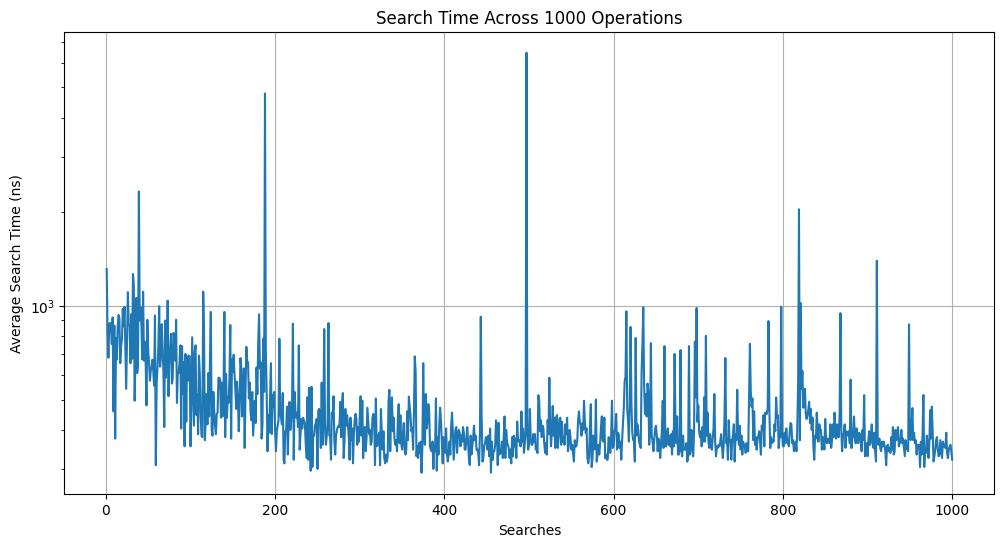

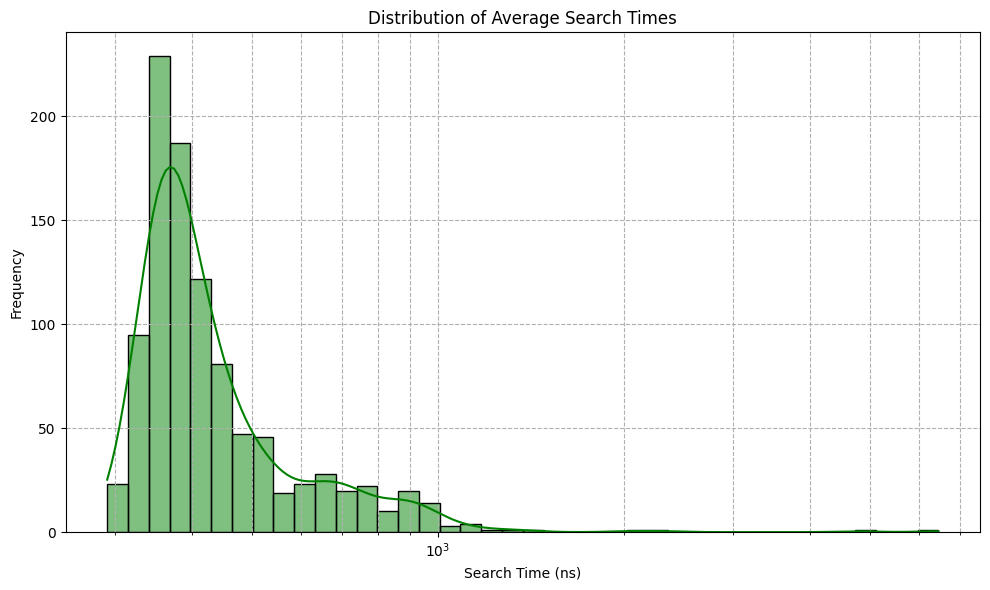

In [41]:
# Average search time of uuid keys across 1000 operations for AVL Trees

averaged_df = pd.read_csv('avl_trees/get/uuid_keys/avl_tree_average_get_metrics_1k.csv')

print(averaged_df['duration'].describe())

plt.figure(figsize=(12, 6))
sns.lineplot(x='index', y='duration', data=averaged_df)
plt.title('Search Time Across 1000 Operations')
plt.xlabel('Searches')
plt.ylabel('Average Search Time (ns)')
plt.yscale('log')
plt.grid(True)
plt.savefig('avl_trees/get/uuid_keys/avl_tree_average_get_metrics_1k_lineplot.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(averaged_df['duration'], bins=40, kde=True, color='g', log_scale=True)
plt.title('Distribution of Average Search Times')
plt.xlabel('Search Time (ns)')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.savefig('avl_trees/get/uuid_keys/avl_tree_average_get_metrics_1k_histogram.png', bbox_inches='tight')
plt.show()

### Average search time of 1MB keys in Hash tables across 1000 operations

count    1.000000e+03
mean     3.738303e+05
std      3.139961e+05
min      1.098330e+05
25%      2.520520e+05
50%      3.276460e+05
75%      4.101978e+05
max      5.765291e+06
Name: duration, dtype: float64


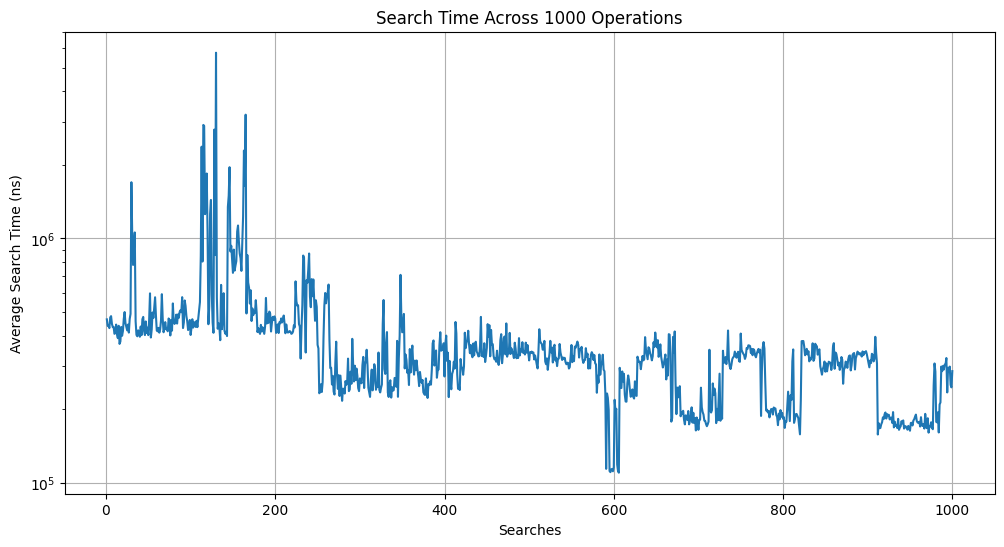

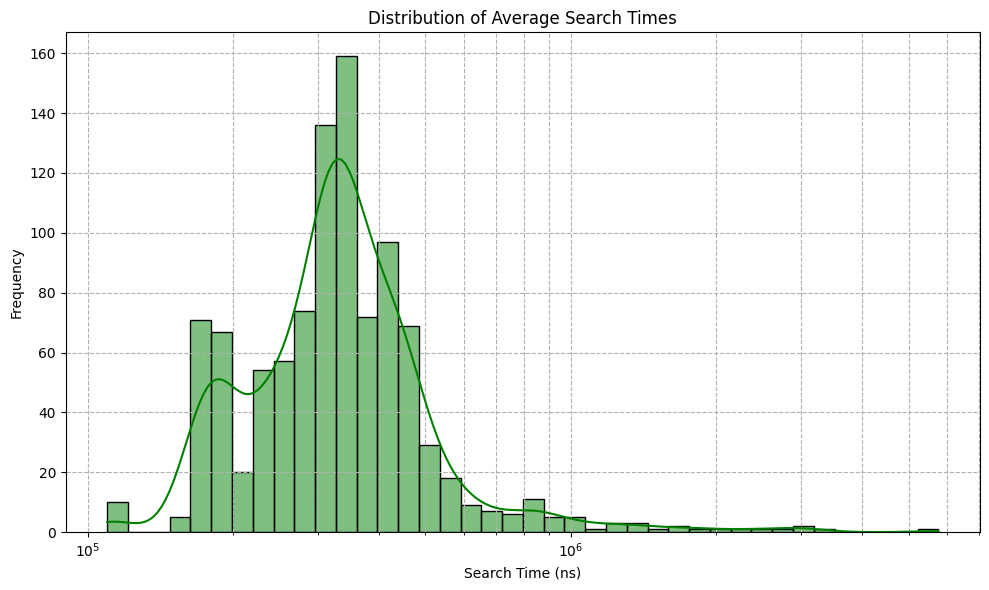

In [8]:
# Average search time of uuid keys across 1000 operations for AVL Trees

averaged_df = pd.read_csv('hash_tables/get/1MB_keys/hash_table_get_metrics_1k_test6.csv')

print(averaged_df['duration'].describe())

plt.figure(figsize=(12, 6))
sns.lineplot(x='index', y='duration', data=averaged_df)
plt.title('Search Time Across 1000 Operations')
plt.xlabel('Searches')
plt.ylabel('Average Search Time (ns)')
plt.yscale('log')
plt.grid(True)
# plt.savefig('hash_tables/get/1MB_keys/hash_table_average_get_metrics_1k_1MB_lineplot.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(averaged_df['duration'], bins=40, kde=True, color='g', log_scale=True)
plt.title('Distribution of Average Search Times')
plt.xlabel('Search Time (ns)')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
# plt.savefig('hash_tables/get/1MB_keys/hash_table_average_get_metrics_1k_1MB_histogram.png', bbox_inches='tight')
plt.show()

### Average search time of 1MB keys in AVL Trees across 1000 operations

count    1.000000e+03
mean     5.271815e+05
std      6.910206e+05
min      9.370800e+04
25%      2.914480e+05
50%      3.587295e+05
75%      4.404268e+05
max      8.087125e+06
Name: duration, dtype: float64


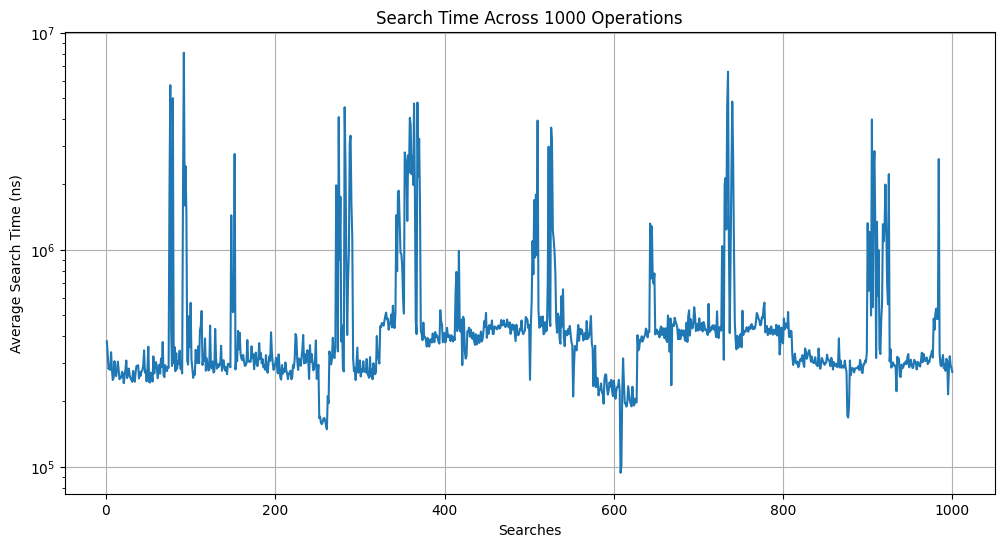

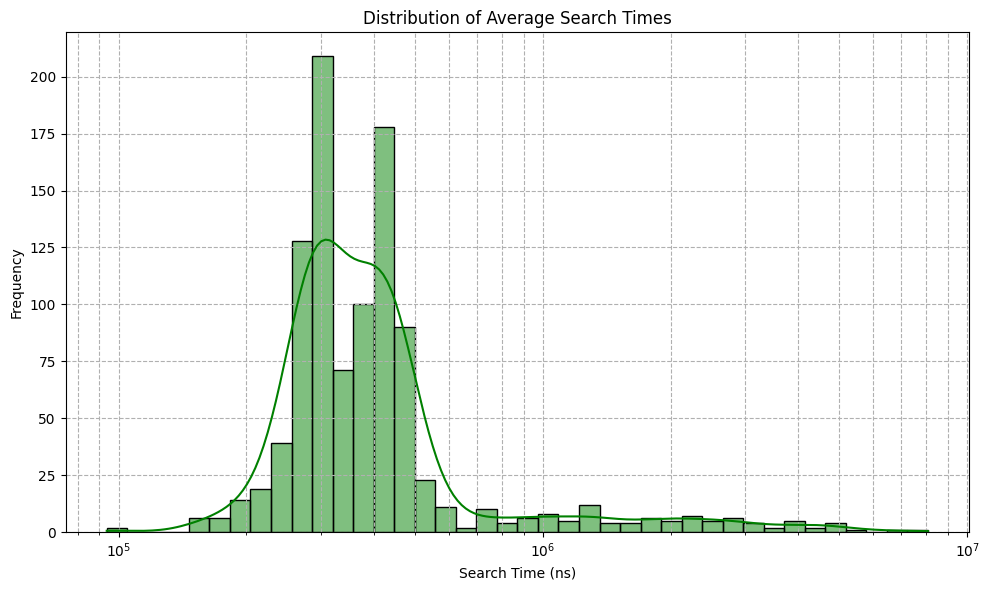

In [18]:
# Average search time of 1MB keys across 1000 operations for AVL Trees

averaged_df = pd.read_csv('avl_trees/get/1MB_keys/avl_tree_get_metrics_1k_test10.csv')

print(averaged_df['duration'].describe())

plt.figure(figsize=(12, 6))
sns.lineplot(x='index', y='duration', data=averaged_df)
plt.title('Search Time Across 1000 Operations')
plt.xlabel('Searches')
plt.ylabel('Average Search Time (ns)')
plt.yscale('log')
plt.grid(True)
# plt.savefig('avl_trees/get/1MB_keys/avl_tree_average_get_metrics_1k_1MB_lineplot.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(averaged_df['duration'], bins=40, kde=True, color='g', log_scale=True)
plt.title('Distribution of Average Search Times')
plt.xlabel('Search Time (ns)')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
# plt.savefig('avl_trees/get/1MB_keys/avl_tree_average_get_metrics_1k_1MB_histogram.png', bbox_inches='tight')
plt.show()

### Search time for 5 types of range queries in Hash tables 

count         5.000000
mean     481508.600000
std      172177.438156
min      319292.000000
25%      371250.000000
50%      423292.000000
75%      541875.000000
max      751834.000000
Name: duration, dtype: float64


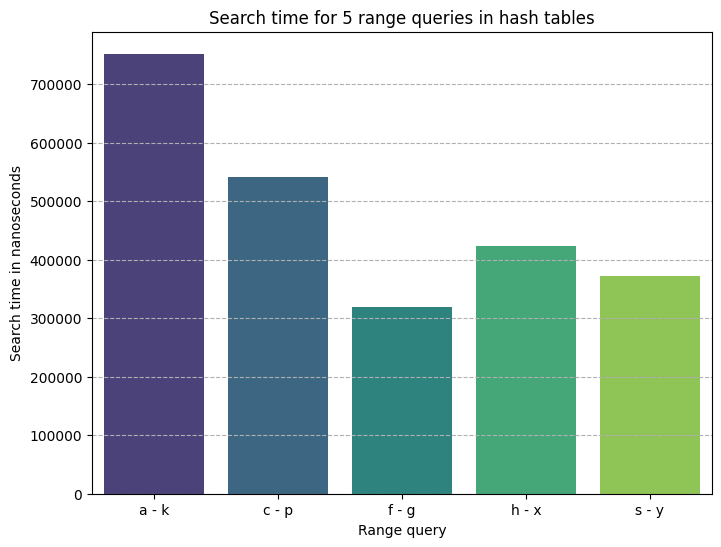

In [18]:
averaged_df = pd.read_csv('hash_tables/get-range/hash_table_benchmark_get_range.csv')

print(averaged_df['duration'].describe())

mean_duration = averaged_df['duration'].mean()
std_duration = averaged_df['duration'].std()

plt.figure(figsize=(8, 6))
sns.barplot(x='query', y='duration', data=averaged_df, hue='query', palette='viridis', legend=False)
plt.title('Search time for 5 range queries in hash tables')
plt.xlabel('Range query')
plt.ylabel('Search time in nanoseconds')
plt.grid(axis='y', linestyle='--')
plt.savefig('hash_tables/get-range/hash_table_benchmark_get_range_histogram.png', bbox_inches='tight')
plt.show()

### Search time for 5 types of range queries in AVL trees

count         5.000000
mean     147233.400000
std      164951.208914
min        3417.000000
25%       32167.000000
50%      130000.000000
75%      150208.000000
max      420375.000000
Name: duration, dtype: float64


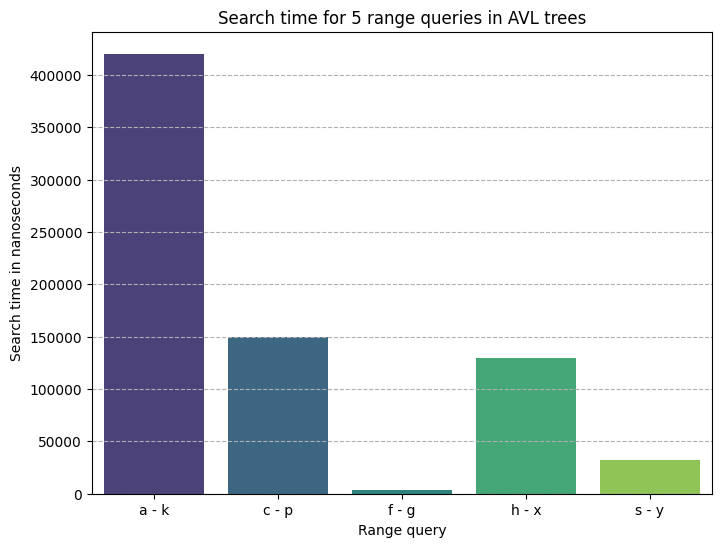

In [19]:
averaged_df = pd.read_csv('avl_trees/get-range/avl_tree_benchmark_get_range.csv')

print(averaged_df['duration'].describe())

mean_duration = averaged_df['duration'].mean()
std_duration = averaged_df['duration'].std()

plt.figure(figsize=(8, 6))
sns.barplot(x='query', y='duration', data=averaged_df, hue='query', palette='viridis', legend=False)
plt.title('Search time for 5 range queries in AVL trees')
plt.xlabel('Range query')
plt.ylabel('Search time in nanoseconds')
plt.grid(axis='y', linestyle='--')
plt.savefig('avl_trees/get-range/avl_tree_benchmark_get_range_histogram.png', bbox_inches='tight')
plt.show()

### Average deletion time of uuid keys in Hash Tables across 1000 operations

count    1000.000000
mean      182.809000
std       191.806665
min        91.500000
25%       112.700000
50%       129.200000
75%       187.525000
max      4116.700000
Name: duration, dtype: float64
mean:  182.809
std:  191.80666462768073
CV:  1.049218936855848


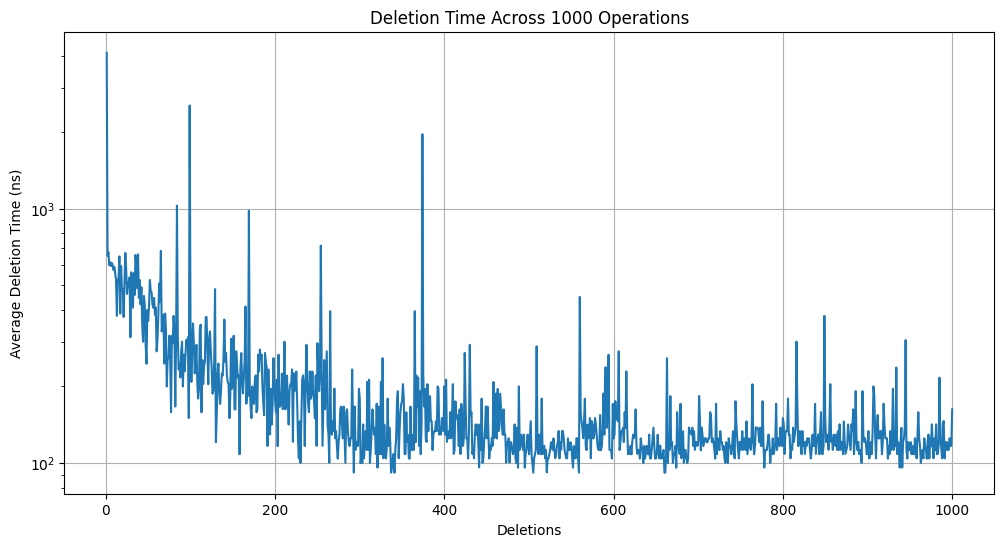

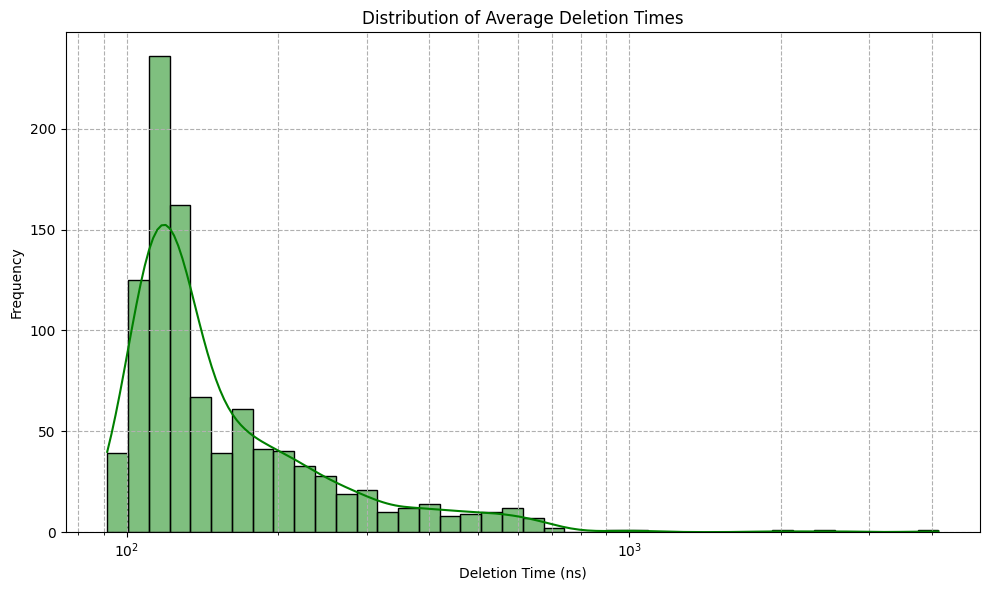

In [24]:
# Average deletion time of uuid keys across 1000 operations for Hash tables

averaged_df = pd.read_csv('hash_tables/del/uuid_keys/hash_table_average_del_metrics_1k.csv')

print(averaged_df['duration'].describe())

mean_duration = averaged_df['duration'].mean()
std_duration = averaged_df['duration'].std()

coeff_var = std_duration / mean_duration

print('mean: ', mean_duration)
print('std: ', std_duration)
print('CV: ', coeff_var)

plt.figure(figsize=(12, 6))
sns.lineplot(x='index', y='duration', data=averaged_df)
plt.title('Deletion Time Across 1000 Operations')
plt.xlabel('Deletions')
plt.ylabel('Average Deletion Time (ns)')
plt.yscale('log')
plt.grid(True)
# plt.savefig('hash_tables/del/uuid_keys/hash_table_average_del_metrics_1k_lineplot.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(averaged_df['duration'], bins=40, kde=True, color='g', log_scale=True)
plt.title('Distribution of Average Deletion Times')
plt.xlabel('Deletion Time (ns)')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
# plt.savefig('hash_tables/del/uuid_keys/hash_table_average_del_metrics_1k_histogram.png', bbox_inches='tight')
plt.show()

### Average deletion time of uuid keys in AVL Trees across 1000 operations

count     1000.000000
mean       329.413000
std        847.102263
min        125.000000
25%        208.000000
50%        250.000000
75%        291.000000
max      23833.000000
Name: duration, dtype: float64
mean:  329.413
std:  847.1022634107854
CV:  2.57155079918153


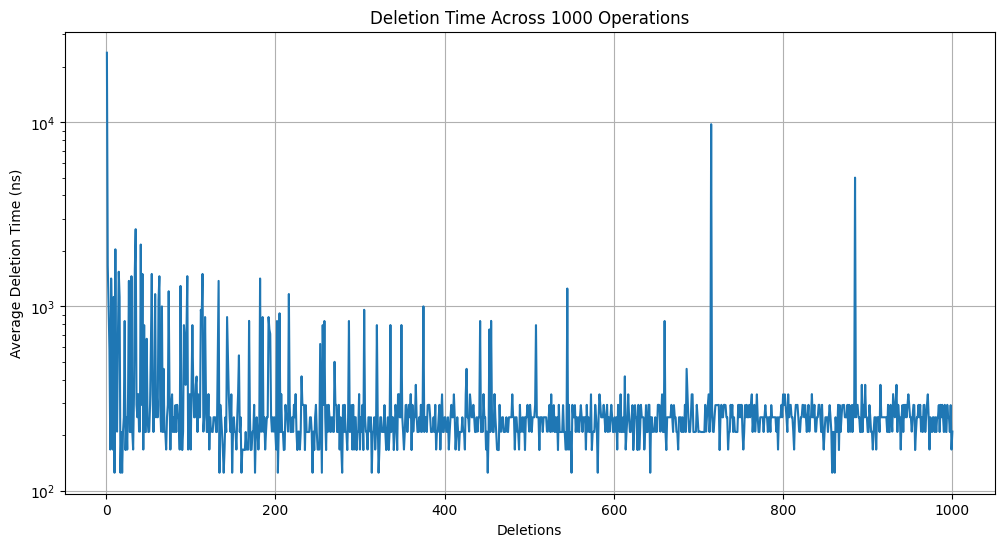

In [35]:
# Average deletion time of uuid keys across 1000 operations for AVL Trees

averaged_df = pd.read_csv('avl_trees/del/uuid_keys/avl_tree_del_metrics_1k_test10.csv')

print(averaged_df['duration'].describe())

mean_duration = averaged_df['duration'].mean()
std_duration = averaged_df['duration'].std()

coeff_var = std_duration / mean_duration

print('mean: ', mean_duration)
print('std: ', std_duration)
print('CV: ', coeff_var)

plt.figure(figsize=(12, 6))
sns.lineplot(x='index', y='duration', data=averaged_df)
plt.title('Deletion Time Across 1000 Operations')
plt.xlabel('Deletions')
plt.ylabel('Average Deletion Time (ns)')
plt.yscale('log')
plt.grid(True)
# plt.savefig('avl_trees/del/uuid_keys/avl_tree_average_del_metrics_1k_lineplot.png', bbox_inches='tight')
plt.show()

# plt.figure(figsize=(10, 6))
# sns.histplot(averaged_df['duration'], bins=40, kde=True, color='g', log_scale=True)
# plt.title('Distribution of Average Deletion Times')
# plt.xlabel('Deletion Time (ns)')
# plt.ylabel('Frequency')
# plt.grid(True, which="both", ls="--")
# plt.tight_layout()
# plt.savefig('avl_trees/del/uuid_keys/avl_tree_average_del_metrics_1k_histogram.png', bbox_inches='tight')
# plt.show()

### Average deletion time of 1MB keys in Hash tables across 1000 operations

count    1.000000e+03
mean     2.217927e+05
std      1.321818e+05
min      9.158340e+04
25%      1.627364e+05
50%      2.104813e+05
75%      2.531584e+05
max      2.829712e+06
Name: duration, dtype: float64


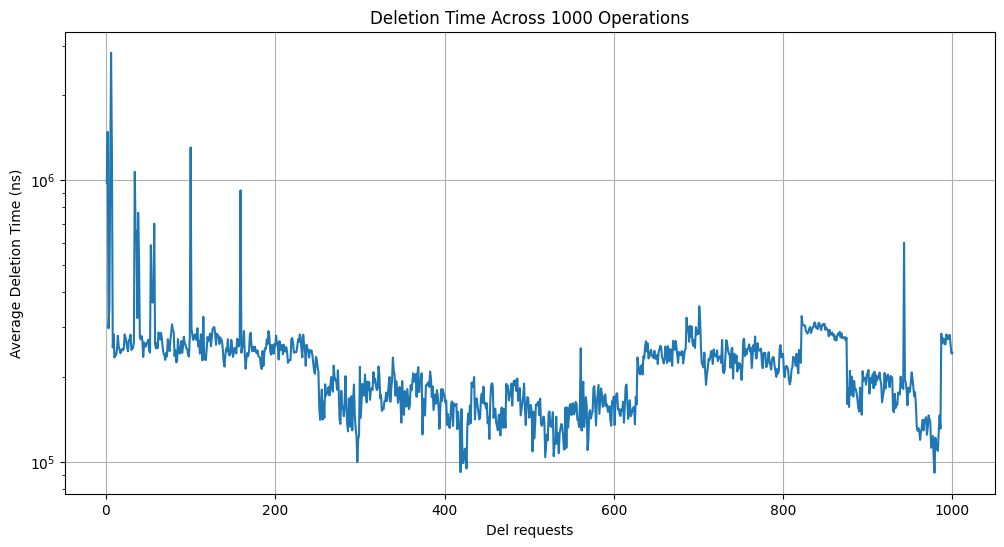

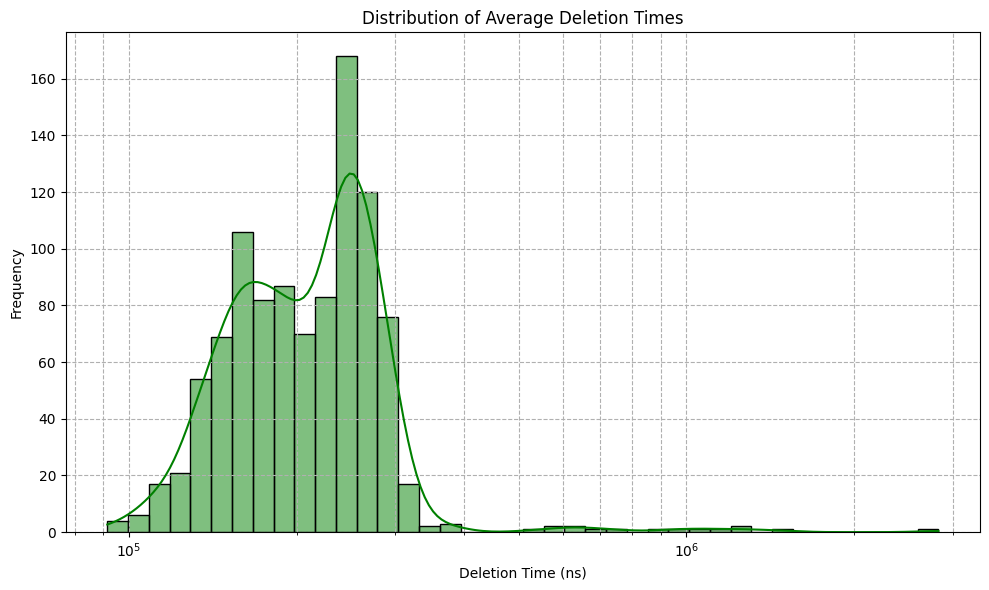

In [8]:
# Average deletion time of 1MB keys across 1000 operations for Hash tables

averaged_df = pd.read_csv('hash_tables/del/1MB_keys/hash_table_average_del_metrics_1k.csv')

print(averaged_df['duration'].describe())

plt.figure(figsize=(12, 6))
sns.lineplot(x='index', y='duration', data=averaged_df)
plt.title('Deletion Time Across 1000 Operations')
plt.xlabel('Del requests')
plt.ylabel('Average Deletion Time (ns)')
plt.yscale('log')
plt.grid(True)
plt.savefig('hash_tables/del/1MB_keys/hash_table_average_del_metrics_1k_lineplot.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(averaged_df['duration'], bins=40, kde=True, color='g', log_scale=True)
plt.title('Distribution of Average Deletion Times')
plt.xlabel('Deletion Time (ns)')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.savefig('hash_tables/del/1MB_keys/hash_table_average_del_metrics_1k_histogram.png')
plt.show()

### Average deletion time of 1MB keys in AVL Trees across 1000 operations

count    1.000000e+03
mean     2.836940e+05
std      1.605398e+05
min      1.433790e+05
25%      2.146616e+05
50%      2.702291e+05
75%      3.141032e+05
max      2.488058e+06
Name: duration, dtype: float64


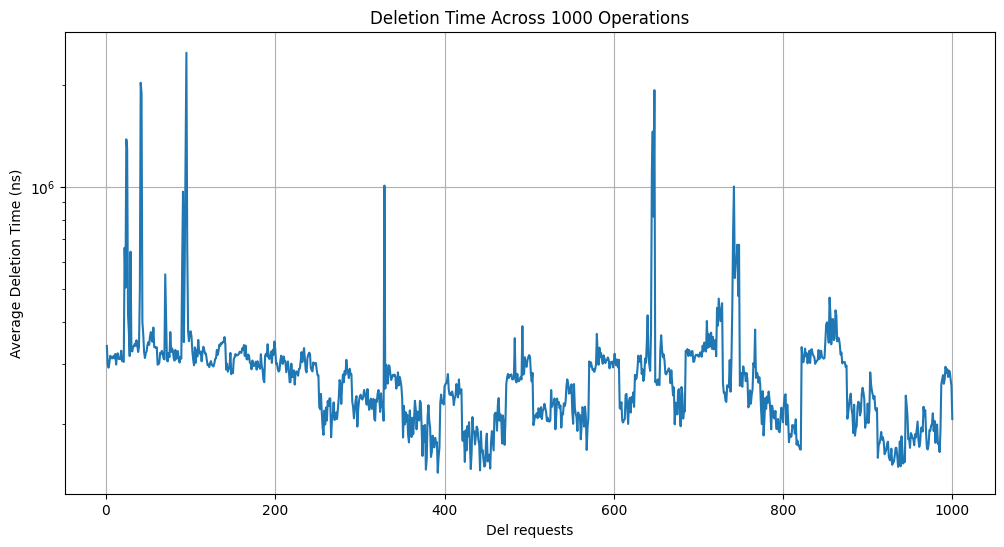

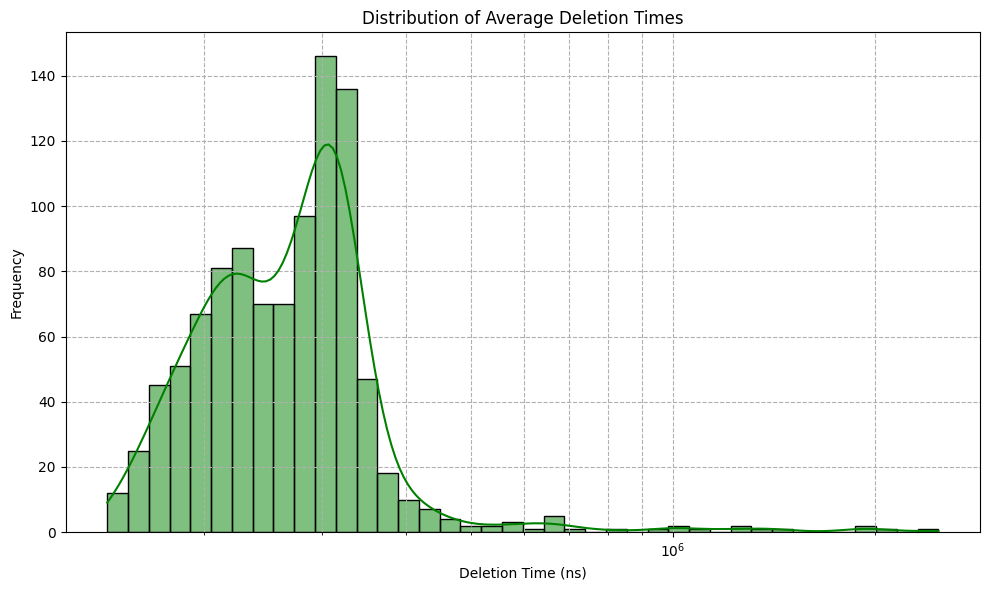

In [9]:
# Average deletion time of 1MB keys across 1000 operations for Hash tables

averaged_df = pd.read_csv('avl_trees/del/1MB_keys/avl_tree_average_del_metrics_1k.csv')

print(averaged_df['duration'].describe())

plt.figure(figsize=(12, 6))
sns.lineplot(x='index', y='duration', data=averaged_df)
plt.title('Deletion Time Across 1000 Operations')
plt.xlabel('Del requests')
plt.ylabel('Average Deletion Time (ns)')
plt.yscale('log')
plt.grid(True)
plt.savefig('avl_trees/del/1MB_keys/avl_tree_average_del_metrics_1k_lineplot.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(averaged_df['duration'], bins=40, kde=True, color='g', log_scale=True)
plt.title('Distribution of Average Deletion Times')
plt.xlabel('Deletion Time (ns)')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.savefig('avl_trees/del/1MB_keys/avl_tree_average_del_metrics_1k_histogram.png')
plt.show()

### Throughput for set operations measured in tps (transactions per second) for Hash Tables

count        10.000000
mean     738205.800000
std       23350.711004
min      697114.000000
25%      722076.000000
50%      736441.500000
75%      759518.750000
max      764920.000000
Name: tps, dtype: float64


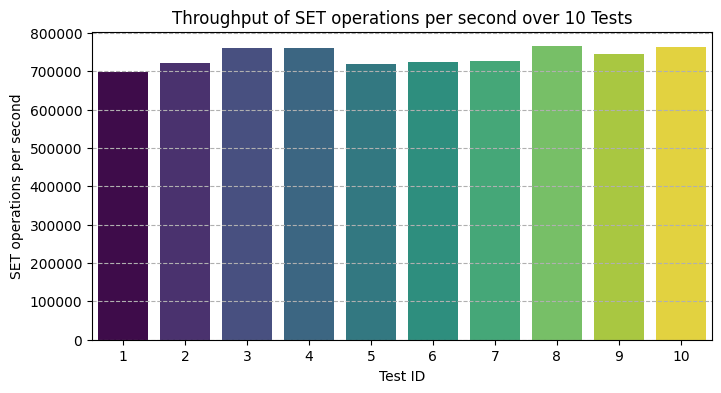

In [99]:
df = pd.read_csv('hash_tables/throughput/hash_table_tps_set_metrics.csv')

print(df['tps'].describe())

plt.figure(figsize=(8, 4))
sns.barplot(x='test_id', y='tps', data=df, hue='test_id', palette='viridis', legend=False)
plt.title('Throughput of SET operations per second over 10 Tests')
plt.xlabel('Test ID')
plt.ylabel('SET operations per second')
plt.grid(axis='y', linestyle='--')
plt.savefig('hash_tables/throughput/hash_table_tps_set_metrics_plot.png', bbox_inches='tight')
plt.show()

### Throughput for get operations measured in tps (transactions per second) for Hash Tables

count    1.000000e+01
mean     3.428109e+06
std      8.551593e+05
min      1.558058e+06
25%      3.080354e+06
50%      3.501219e+06
75%      4.072993e+06
max      4.344544e+06
Name: tps, dtype: float64


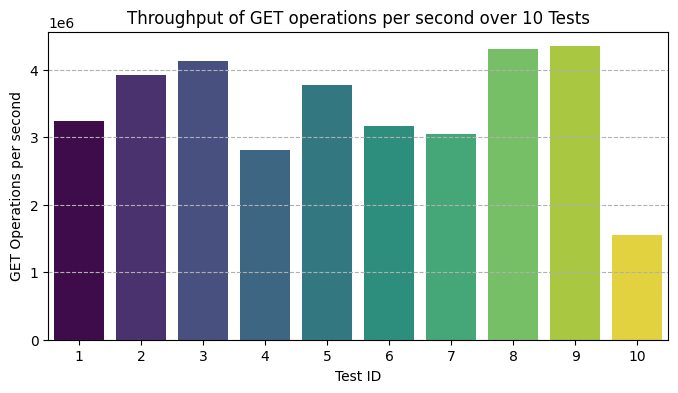

In [100]:
df = pd.read_csv('hash_tables/throughput/hash_table_tps_get_metrics.csv')

print(df['tps'].describe())

plt.figure(figsize=(8, 4))
sns.barplot(x='test_id', y='tps', data=df, hue='test_id', palette='viridis', legend=False)
plt.title('Throughput of GET operations per second over 10 Tests')
plt.xlabel('Test ID')
plt.ylabel('GET Operations per second')
plt.grid(axis='y', linestyle='--')
plt.savefig('hash_tables/throughput/hash_table_tps_get_metrics_plot.png', bbox_inches='tight')
plt.show()

### Throughput for del operations measured in tps (transactions per second) for Hash tables

count    1.000000e+01
mean     3.859593e+06
std      5.356947e+05
min      2.923674e+06
25%      3.473575e+06
50%      3.819766e+06
75%      4.327651e+06
max      4.572281e+06
Name: tps, dtype: float64


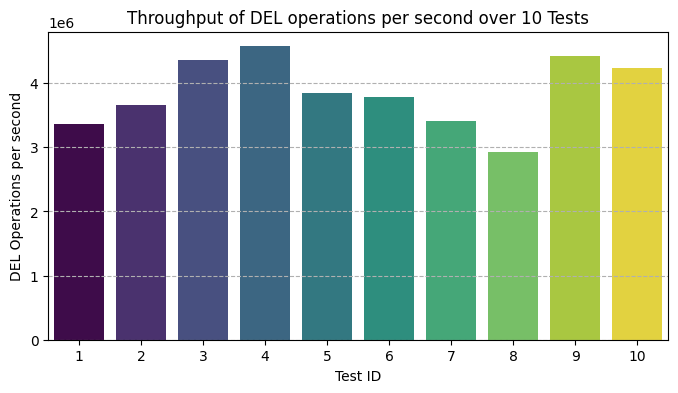

In [101]:
df = pd.read_csv('hash_tables/throughput/hash_table_tps_del_metrics.csv')

print(df['tps'].describe())

plt.figure(figsize=(8, 4))
sns.barplot(x='test_id', y='tps', data=df, hue='test_id', palette='viridis', legend=False)
plt.title('Throughput of DEL operations per second over 10 Tests')
plt.xlabel('Test ID')
plt.ylabel('DEL Operations per second')
plt.grid(axis='y', linestyle='--')
plt.savefig('hash_tables/throughput/hash_table_tps_del_metrics_plot.png', bbox_inches='tight')
plt.show()

### Throughput for set operations measured in tps (transactions per second) for AVL Trees

count        10.000000
mean     496800.000000
std        9786.104378
min      477501.000000
25%      491084.250000
50%      497286.500000
75%      504346.000000
max      510417.000000
Name: tps, dtype: float64


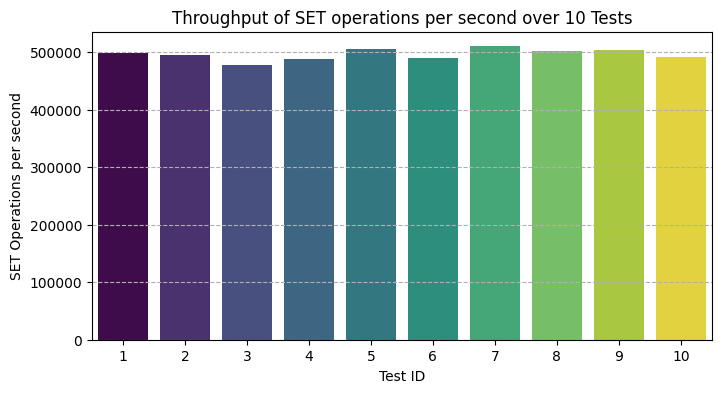

In [105]:
df = pd.read_csv('avl_trees/throughput/avl_tree_tps_set_metrics.csv')

print(df['tps'].describe())

plt.figure(figsize=(8, 4))
sns.barplot(x='test_id', y='tps', data=df, hue='test_id', palette='viridis', legend=False)
plt.title('Throughput of SET operations per second over 10 Tests')
plt.xlabel('Test ID')
plt.ylabel('SET Operations per second')
plt.grid(axis='y', linestyle='--')
plt.savefig('avl_trees/throughput/avl_tree_tps_set_metrics_plot.png', bbox_inches='tight')
plt.show()

### Throughput for get operations measured in tps (transactions per second) for AVL Trees

count        10.000000
mean     921938.400000
std       45208.377538
min      848107.000000
25%      882991.000000
50%      941805.000000
75%      954533.250000
max      961133.000000
Name: tps, dtype: float64


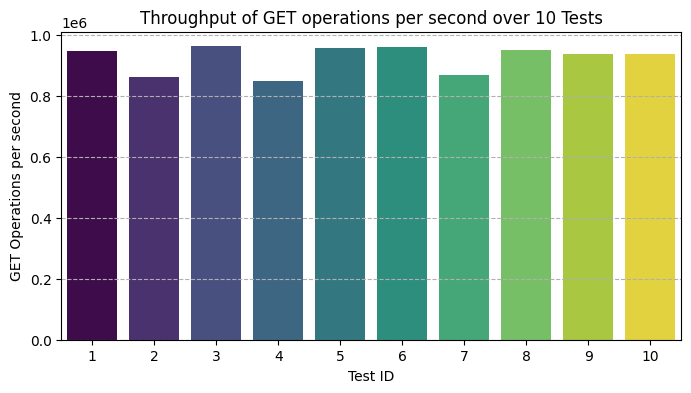

In [106]:
df = pd.read_csv('avl_trees/throughput/avl_tree_tps_get_metrics.csv')
print(df['tps'].describe())

plt.figure(figsize=(8, 4))
sns.barplot(x='test_id', y='tps', data=df, hue='test_id', palette='viridis', legend=False)
plt.title('Throughput of GET operations per second over 10 Tests')
plt.xlabel('Test ID')
plt.ylabel('GET Operations per second')
plt.grid(axis='y', linestyle='--')
plt.savefig('avl_trees/throughput/avl_tree_tps_get_metrics_plot.png', bbox_inches='tight')
plt.show()

### Throughput for del operations measured in tps (transactions per second) for AVL Trees

count        10.000000
mean     661499.800000
std       23166.557188
min      626676.000000
25%      644168.500000
50%      664788.000000
75%      679000.500000
max      692638.000000
Name: tps, dtype: float64


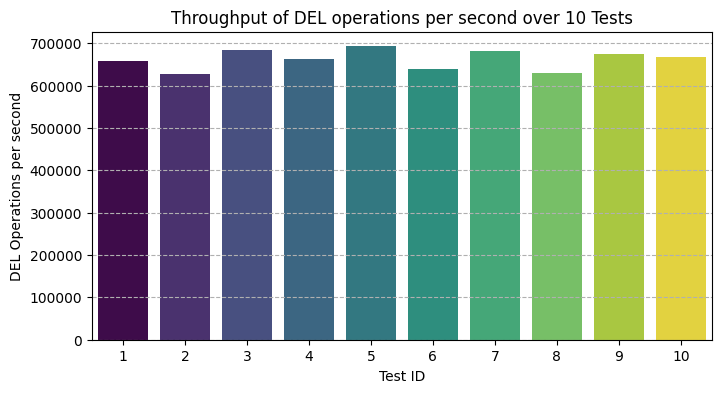

In [107]:
df = pd.read_csv('avl_trees/throughput/avl_tree_tps_del_metrics.csv')
print(df['tps'].describe())

plt.figure(figsize=(8, 4))
sns.barplot(x='test_id', y='tps', data=df, hue='test_id', palette='viridis', legend=False)
plt.title('Throughput of DEL operations per second over 10 Tests')
plt.xlabel('Test ID')
plt.ylabel('DEL Operations per second')
plt.grid(axis='y', linestyle='--')
plt.savefig('avl_trees/throughput/avl_tree_tps_del_metrics_plot.png', bbox_inches='tight')
plt.show()